# Clustering GAINCapital clients with K_Means
#### *Author: Taras Poltorak*
#### *Date: 29/04/2020*


## Introduction

The point of this exercise is to apply a K-Means clustering algorithm to a dataset of clients based on their age, trading experience, income etc.


In [0]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pylab as pl

We read in the Excel file and load it into a dataframe. Now we can have a look at the data.

In [0]:
df = pd.read_excel (r'/content/Clustering_CaseStudy_28042020.xlsx')
df = df.drop(['BK_ApplicationId'], axis=1)



In [0]:
df.insert(0, "ID", df.index + 1)

In [53]:
df.head(3)

,ID,Service Offering,Age Score,Trading Experience Score,Net Worth Score,Income Score,Sales Channel,Sales Sub Channel,Age Group,Date of Birth,Gender,Device,Gender_Sort,Device_Sort
0,1,FOREX.com US,2,2.0,1.5,2.0,Direct,Direct,18 - 25,Jan 20 1999 12:00AM,Male,iPhone,1,2
1,2,FOREX.com US,3,15.0,5.5,2.0,Direct,Direct,26 - 30,Nov 11 1991 12:00AM,Male,Desktop,1,1
2,3,FOREX.com US,2,5.0,2.5,2.0,Direct,Direct,18 - 25,Mar 22 1998 12:00AM,Male,Desktop,1,1


We select the features which we will later use in our model. K-Means only works with numeric values.  Luckily, categorical features such as Age and Gender have already been scored, so we select all the numerical features.  There is a very small number of missing values in the dataset. Because the data is categorical we cannot impute them and, therefore, they will be removed. 

In [54]:
x = df.iloc[:, [2,3,4,5,12,13]] 
x = x.dropna()
x = x.reset_index(drop=True)

x

,Age Score,Trading Experience Score,Net Worth Score,Income Score,Gender_Sort,Device_Sort
0,2,2.0,1.5,2.0,1,2
1,3,15.0,5.5,2.0,1,1
2,2,5.0,2.5,2.0,1,1
3,2,8.0,3.5,3.0,2,3
4,2,1.0,3.5,3.0,1,1
...,...,...,...,...,...,...
244264,5,40.0,6.5,6.0,1,4
244265,2,0.0,1.5,3.0,1,4
244266,9,14.0,5.5,5.0,2,4
244267,9,60.0,4.5,6.0,1,4


In [55]:
x.describe()

,Age Score,Trading Experience Score,Net Worth Score,Income Score,Gender_Sort,Device_Sort
count,244269.000000,244269.000000,244269.000000,244269.000000,244269.000000,244269.000000
mean,3.493800,2.789564,2.544408,2.543638,1.247072,1.894620
std,2.068643,4.763226,1.236644,1.382431,0.450184,0.763293
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,0.000000,1.500000,1.000000,1.000000,1.000000
50%,3.000000,0.000000,2.500000,2.000000,1.000000,2.000000
75%,4.000000,4.000000,3.500000,3.000000,1.000000,2.000000
max,10.000000,80.000000,7.000000,8.000000,3.000000,4.000000


In [0]:
# At the end of this exercise we will add a column with clusters to the original dataframe, so we remove the missing values from it now 
# so that the data aligns later.


df = df.dropna()
df = df.reset_index(drop=True)

## Standardising Values (Z-score)

Because K-Means uses distance calculations between values, we must standardise our features so that they are all within the same range. This will avoid one feature dominating others.

In [57]:
# Z-score

x = (x - x.mean())/x.std()
x

,Age Score,Trading Experience Score,Net Worth Score,Income Score,Gender_Sort,Device_Sort
0,-0.722116,-0.165762,-0.844550,-0.393248,-0.548824,0.138059
1,-0.238707,2.563481,2.390011,-0.393248,-0.548824,-1.172054
2,-0.722116,0.464063,-0.035910,-0.393248,-0.548824,-1.172054
3,-0.722116,1.093888,0.772730,0.330115,1.672490,1.448173
4,-0.722116,-0.375704,0.772730,0.330115,-0.548824,-1.172054
...,...,...,...,...,...,...
244264,0.728110,7.812025,3.198651,2.500206,-0.548824,2.758286
244265,-0.722116,-0.585646,-0.844550,0.330115,-0.548824,2.758286
244266,2.661745,2.353539,2.390011,1.776843,1.672490,2.758286
244267,2.661745,12.010860,1.581371,2.500206,-0.548824,2.758286


## Perform PCA

In [0]:
pca = PCA(n_components=2).fit(x)
pca_2d = pca.transform(x)




In [59]:
pca_2d.shape

(244269, 2)

## Model Training and Evaluation

The first time K-Means is applied to a dataset the number of clusters is set randomly.  Although, it has to be noted, very often Data Scientist will have some idea about the expected clusters. This comes from practical knowledge about the data. In this instance, however, I have no prior knowledge about the clients and the number 5 is chosen randomly.

In [0]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(pca_2d)





In [61]:
kmeans5.cluster_centers_


array([[-0.97389479, -0.75987649],
       [ 3.41497527, -0.05354191],
       [ 0.84215875,  1.28533258],
       [-1.18273298,  0.96067555],
       [ 0.82437968, -0.61803855]])

To asses the optimal number of clusters we use the Elbow Method.

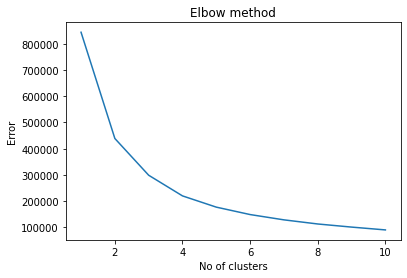

In [62]:


Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(pca_2d)
    kmeans.fit(pca_2d)
    Error.append(kmeans.inertia_)
# import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

Now we re-run our model with 3 clusters.

In [63]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)


kmeans3.cluster_centers_



array([[-0.23508428, -0.37282168, -0.38331477, -0.36366256,  1.72867019,
         0.1650796 ],
       [-0.38150211, -0.25763763, -0.37104846, -0.3255052 , -0.54882426,
         0.06749979],
       [ 1.18997864,  1.00648467,  1.30395096,  1.1698645 , -0.24682761,
        -0.32756952]])

In the above table the 3 rows refer to our clusters. The numbers across each row indicate the cluster's average value for the category listed at the top of the column. Because the values are standardised, positive values are above the overall mean and negative are bellow. The highest values are of most interest to their corresponding clusters.

Now let's visualise our clusters.

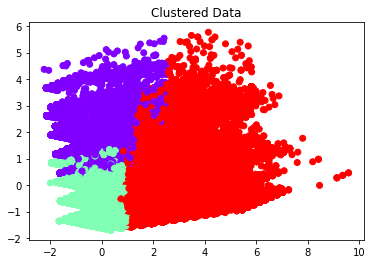

<Figure size 432x288 with 0 Axes>

In [64]:
pl.title('Clustered Data')
pl.scatter(pca_2d[:, 0], pca_2d[:, 1], c=y_kmeans3, cmap= 'rainbow')
kmeans = KMeans(n_clusters=3, random_state=111)
pl.figure('K-means with 3 clusters')
pl.show()

In [0]:
# # Let's turn the numpy array of predictions into a dataframe object and add it as a cloumn to the original dataframe.

predictions_df = pd.DataFrame(data=y_kmeans3)
df['Cluster'] = predictions_df

In [66]:
list(df.columns)

['ID',
 'Service Offering',
 'Age Score',
 'Trading Experience Score',
 'Net Worth Score',
 'Income Score',
 'Sales Channel',
 'Sales Sub Channel',
 'Age Group',
 'Date of Birth',
 'Gender',
 'Device',
 'Gender_Sort',
 'Device_Sort',
 'Cluster']

So, we can see that the column **Clusters** has been added to the original dataframe.

In [67]:
df

,ID,Service Offering,Age Score,Trading Experience Score,Net Worth Score,Income Score,Sales Channel,Sales Sub Channel,Age Group,Date of Birth,Gender,Device,Gender_Sort,Device_Sort,Cluster
0,1,FOREX.com US,2,2.0,1.5,2.0,Direct,Direct,18 - 25,Jan 20 1999 12:00AM,Male,iPhone,1,2,1
1,2,FOREX.com US,3,15.0,5.5,2.0,Direct,Direct,26 - 30,Nov 11 1991 12:00AM,Male,Desktop,1,1,2
2,3,FOREX.com US,2,5.0,2.5,2.0,Direct,Direct,18 - 25,Mar 22 1998 12:00AM,Male,Desktop,1,1,1
3,4,FOREX.com US,2,8.0,3.5,3.0,Direct,Direct,18 - 25,May 28 1994 12:00AM,Female,Android,2,3,0
4,5,FOREX.com US,2,1.0,3.5,3.0,Direct,Direct,18 - 25,Jun 3 1995 12:00AM,Male,Desktop,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239472,244280,FOREX.com US,3,6.0,3.5,4.0,Direct,Direct,26 - 30,Dec 4 1992 12:00AM,Male,Desktop,1,1,1
239473,244281,FOREX.com US,3,0.0,1.5,3.0,Direct,Direct,26 - 30,Dec 6 1991 12:00AM,Male,iPhone,1,2,0
239474,244282,FOREX.com US,4,0.0,2.5,3.0,Direct,Direct,31 - 35,Feb 15 1984 12:00AM,Female,Android,2,3,0
239475,244283,FOREX.com US,2,0.0,2.5,3.0,Direct,Direct,18 - 25,Jul 10 2000 12:00AM,Male,iPhone,1,2,2


We can see that every client now has one of the 3 clusters (first one numbered 0) assigned to them in the column **Clusters**.